En changeant de stratégie, le joueur a gagné 6710 sur 10 000 parties
En gardant le choix initial, le joueur à gagné 3327 sur 10 000 parties


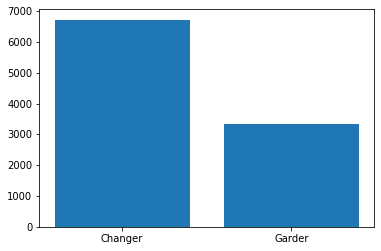

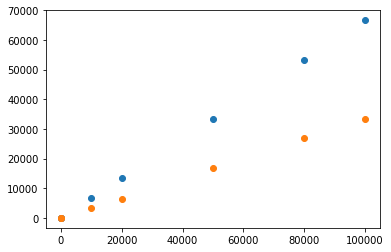

In [25]:
# pour afficher directement dans le notebook
%matplotlib inline

from random import randint, seed
from enum import Enum
import matplotlib.pyplot as plt


class Strategie(Enum):
    CHANGER = 1
    GARDER = 2


seed()


def play_game(strategie):
    """ simulation d'une partie de Monty Hall 
    
    simule le choix de porte par le joueur,
    l'élimination d'une mauvaise porte (rien derrière) 
    par le MDJ, et le choix final.
    Elle ne retourne que le résulta de la partie, il 
    n'y a pas besoin d'autre chose pour la suite.
    
    Arg:
        strategie (Strategie): stratégie du joueur
    
    Return:
        bool: le joueur a-t-il gagné ?
    """
    portes = [0, 1, 2]
    bonne_porte = randint(0, 2)
    
    # choix joueur
    premier_choix = randint(0, 2)
    
    # il doit nous rester 2 portes
    portes.remove(premier_choix)
    
    # le MDJ élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0, 1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # le second choix dépend de la stratégie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix == premier_choix
    else:
        raise ValueError('Stratégie inconnue !')
        
    return deuxieme_choix == bonne_porte


def play(strategie, nb_tours):
    """ simule une suite de jeux Monty Hall
    
    renvoie les résultats de plusieurs parties sous forme 
    d'une liste de gains
    
    
    Args:
        strategie (Strategie): stratégie du joueur
        nb_tours (int): nombre de tours
        
    Return:
        list: liste des gains du joueur à chaque partie
    """
    
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)] 

print(f'En changeant de stratégie, le joueur a gagné {sum(play(Strategie.CHANGER, 10000))} sur 10 000 parties')

print(f'En gardant le choix initial, le joueur à gagné {sum(play(Strategie.GARDER, 10000))} sur 10 000 parties')

# plot = plt.plot(play(Strategie.CHANGER, 10000))
# plot = plt.scatter(range(10000), play(Strategie.CHANGER, 10000))
plot = plt.bar([1, 2], [sum(play(Strategie.CHANGER, 10000)),
                        sum(play(Strategie.GARDER, 10000))],
              tick_label=['Changer', 'Garder'])


gains_changer = []
gains_garder = []
samples = [10, 100, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])
# TODO: la moyenne de gains de chaque stratégie par partie ->
# diviser la somme des gains par le nombre de parties.
# plot = plt.scatter(samples, [sum(x)/y for x in gains_changer and for y in samples])

Exercice :

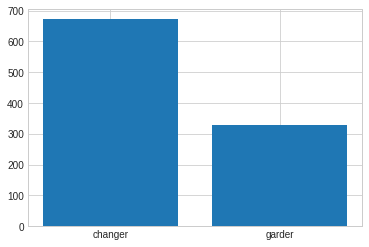

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

N_TRIALS = 1000
prizes = np.random.randint(0, 3, size=(N_TRIALS))
first_choices = np.random.randint(0, 3, size=(N_TRIALS))

switching_players_gains = (prizes != first_choices).astype(int)
keeping_players_gains = (prizes == first_choices).astype(int)

plot = plt.bar([1, 2], [switching_players_gains.sum(), keeping_players_gains.sum()],
              tick_label=["changer", "garder"])


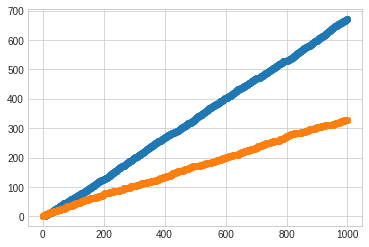

In [4]:
figure = plt.figure()
plot = plt.scatter(range(N_TRIALS), switching_players_gains.cumsum())
plot = plt.scatter(range(N_TRIALS), keeping_players_gains.cumsum())
